<a href="https://colab.research.google.com/github/YawarRizwan/Machine_Learning/blob/main-(projects)/Predicting_Absenteeism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUPERVISED LEARNING - Classification problem 


---


# GOAL: Create a model to predict redict absenteeism

## Import the relevant libraries

In [344]:
# import the relevant libraries
import pandas as pd
import numpy as np

## Load the data

In [345]:
# load the preprocessed CSV data
data_preprocessed = pd.read_csv('Absenteeism_preprocessed.csv')

In [346]:
# eyeball the data
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


## Create the targets

In [347]:
# find the median of 'Absenteeism Time in Hours'
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

In [348]:
# Create targets for our logistic regression
# they have to be categories and we must find a way to say if someone is 'being absent too much' or not
# what we've decided to do is to take the median of the dataset as a cut-off line
# in this way the dataset will be balanced (there will be roughly equal number of 0s and 1s for the logistic regression)
# as balancing is a great problem for ML, this will work great for us
# alternatively, if we had more data, we could have found other ways to deal with the issue 
# for instance, we could have assigned some arbitrary value as a cut-off line, instead of the median

# note that what line does is to assign 1 to anyone who has been absent 4 hours or more (more than 3 hours)
# that is the equivalent of taking half a day off

# initial code from the lecture
# targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > 3, 1, 0)

# parameterized code
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > 
                   data_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)

In [349]:
# eyeball the targets
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [350]:
# create a Series in the original data frame that will contain the targets for the regression
data_preprocessed['Excessive Absenteeism'] = targets

In [351]:
# check what happened
# maybe manually see how the targets were created
data_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pet,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


## A comment on the targets

In [352]:
# check if dataset is balanced (what % of targets are 1s)
# targets.sum() will give us the number of 1s that there are
# the shape[0] will give us the length of the targets array
targets.sum() / targets.shape[0]

0.45571428571428574

In [353]:
# create a checkpoint by dropping the unnecessary variables
# also drop the variables we 'eliminated' after exploring the weights
data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours','Day of the Week',
                                            'Daily Work Load Average','Distance to Work'],axis=1)

In [354]:
# check if the line above is a checkpoint :)

# if data_with_targets is data_preprocessed = True, then the two are pointing to the same object
# if it is False, then the two variables are completely different and this is in fact a checkpoint
data_with_targets is data_preprocessed

False

In [355]:
# check what's inside
data_with_targets.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pet,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0


## Select the inputs for the regression

In [356]:
data_with_targets.shape

(700, 12)

In [357]:
# Selects all rows and all columns until 14 (excluding)
data_with_targets.iloc[:,:14]

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pet,Excessive Absenteeism
0,0,0,0,1,7,289,33,30,0,2,1,1
1,0,0,0,0,7,118,50,31,0,1,0,0
2,0,0,0,1,7,179,38,31,0,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0,1
4,0,0,0,1,7,289,33,30,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0,1
696,1,0,0,0,5,225,28,24,0,1,2,0
697,1,0,0,0,5,330,28,25,1,0,0,1
698,0,0,0,1,5,235,32,25,1,0,0,0


In [358]:
# Selects all rows and all columns but the last one (basically the same operation)
data_with_targets.iloc[:,:-1]

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pet
0,0,0,0,1,7,289,33,30,0,2,1
1,0,0,0,0,7,118,50,31,0,1,0
2,0,0,0,1,7,179,38,31,0,0,0
3,1,0,0,0,7,279,39,24,0,2,0
4,0,0,0,1,7,289,33,30,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,5,179,40,22,1,2,0
696,1,0,0,0,5,225,28,24,0,1,2
697,1,0,0,0,5,330,28,25,1,0,0
698,0,0,0,1,5,235,32,25,1,0,0


In [359]:
# Create a variable that will contain the inputs (everything without the targets)
unscaled_inputs = data_with_targets.iloc[:,:-1]

## Standardize the data

In [360]:
# standardize the inputs
# standardization is one of the most common preprocessing tools
# since data of different magnitude (scale) can be biased towards high values,
# we want all inputs to be of similar magnitude
# this is a peculiarity of machine learning in general - most (but not all) algorithms do badly with unscaled data

# a very useful module we can use is StandardScaler 
# it has much more capabilities than the straightforward 'preprocessing' method
from sklearn.preprocessing import StandardScaler


# we will create a variable that will contain the scaling information for this particular dataset
# here's the full documentation: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

# define scaler as an object
absenteeism_scaler = StandardScaler()

In [361]:
# import the libraries needed to create the Custom Scaler
# note that all of them are a part of the sklearn package
# moreover, one of them is actually the StandardScaler module, 
# so you can imagine that the Custom Scaler is build on it

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [362]:
# check what are all columns that we've got
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pet'], dtype=object)

In [363]:
# choose the columns to scale
# we later augmented this code and put it in comments
# columns_to_scale = ['Month Value','Day of the Week', 'Transportation Expense', 'Distance to Work',
       #'Age', 'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pet']
    
# select the columns to omit
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education']

In [364]:
# create the columns to scale, based on the columns to omit
# use list comprehension to iterate over the list
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [365]:
# declare a scaler object, specifying the columns you want to scale
absenteeism_scaler = CustomScaler(columns_to_scale)

In [366]:
# fit the data (calculate mean and standard deviation); they are automatically stored inside the object 
absenteeism_scaler.fit(unscaled_inputs)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CustomScaler(columns=['Month Value', 'Transportation Expense', 'Age',
                      'Body Mass Index', 'Children', 'Pet'],
             copy=None, with_mean=None, with_std=None)

In [367]:
# standardizes the data, using the transform method 
# in the last line, we fitted the data - in other words
# we found the internal parameters of a model that will be used to transform data. 
# transforming applies these parameters to our data
# note that when you get new data, you can just call 'scaler' again and transform it in the same way as now
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [368]:
# the scaled_inputs are now an ndarray, because sklearn works with ndarrays
scaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pet
0,0,0,0,1,0.030796,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.030796,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.030796,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.030796,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.030796,1.005844,-0.536062,0.767431,0,0.880469,0.268487
...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,-0.568019,-0.654143,0.562059,-1.114186,1,0.880469,-0.589690
696,1,0,0,0,-0.568019,0.040034,-1.320435,-0.643782,0,-0.019280,1.126663
697,1,0,0,0,-0.568019,1.624567,-1.320435,-0.408580,1,-0.919030,-0.589690
698,0,0,0,1,-0.568019,0.190942,-0.692937,-0.408580,1,-0.919030,-0.589690


In [369]:
# check the shape of the inputs
scaled_inputs.shape

(700, 11)

## Split the data into train & test and shuffle

### Import the relevant module

In [370]:
# import train_test_split so we can split our data into train and test
from sklearn.model_selection import train_test_split

### Split

In [371]:
# check how this method works
train_test_split(scaled_inputs, targets)

[     Reason_1  Reason_2  Reason_3  ...  Education  Children       Pet
 648         1         0         0  ...          0  0.880469 -0.589690
 118         0         0         0  ...          0 -0.919030 -0.589690
 414         0         0         0  ...          1 -0.919030 -0.589690
 347         0         0         0  ...          0 -0.919030 -0.589690
 623         0         0         0  ...          0 -0.919030 -0.589690
 ..        ...       ...       ...  ...        ...       ...       ...
 274         1         0         0  ...          0 -0.919030 -0.589690
 203         0         0         0  ...          0 -0.019280  3.701192
 599         0         0         0  ...          0 -0.019280  1.126663
 643         0         0         0  ...          0 -0.919030 -0.589690
 15          1         0         0  ...          0 -0.919030 -0.589690
 
 [525 rows x 11 columns],
      Reason_1  Reason_2  Reason_3  ...  Education  Children       Pet
 527         0         0         0  ...          

In [372]:
# declare 4 variables for the split
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, #train_size = 0.8, 
                                                                            test_size = 0.2, random_state = 20)

In [373]:
# check the shape of the train inputs and targets
print (x_train.shape, y_train.shape)

(560, 11) (560,)


In [374]:
# check the shape of the test inputs and targets
print (x_test.shape, y_test.shape)

(140, 11) (140,)


## Predictive Modeling
Let's explore different methods: Logistic Regression, A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting, XGBoost


### Logistic regression 

In [375]:
# import the LogReg model from sklearn
from sklearn.linear_model import LogisticRegression

# import the 'metrics' module, which includes important metrics we may want to use
from sklearn import metrics

### Training the model

In [376]:
# create a logistic regression object
reg = LogisticRegression()

In [377]:
# fit our train inputs
# that is basically the whole training part of the machine learning
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [378]:
# assess the train accuracy of the model
reg.score(x_train,y_train)

0.7767857142857143

### Manually check the accuracy

In [379]:
# find the model outputs according to our model
model_outputs = reg.predict(x_train)
model_outputs

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [380]:
# compare them with the targets
y_train

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [381]:
# ACTUALLY compare the two variables
model_outputs == y_train

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,

In [382]:
# find out in how many instances we predicted correctly
np.sum((model_outputs==y_train))

435

In [383]:
# get the total number of instances
model_outputs.shape[0]

560

In [384]:
# calculate the accuracy of the model
np.sum((model_outputs==y_train)) / model_outputs.shape[0]

0.7767857142857143

### Finding the intercept and coefficients

In [385]:
# get the intercept (bias) of our model
reg.intercept_

array([-1.60957471])

In [386]:
# get the coefficients (weights) of our model
reg.coef_

array([[ 2.77151176,  0.93168817,  3.09210221,  0.8090592 ,  0.00781237,
         0.62505482, -0.17390339,  0.28829409, -0.24081615,  0.35753531,
        -0.27337422]])

In [387]:
# check what were the names of our columns
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pet'], dtype=object)

In [388]:
# save the names of the columns in an ad-hoc variable
feature_name = unscaled_inputs.columns.values

In [389]:
# use the coefficients from this table (they will be exported later and will be used in Tableau)
# transpose the model coefficients (model.coef_) and throws them into a df (a vertical organization, so that they can be
# multiplied by certain matrices later) 
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)

# add the coefficient values to the summary table
summary_table['Coefficient'] = np.transpose(reg.coef_)

# display the summary table
summary_table

,Feature name,Coefficient
0,Reason_1,2.771512
1,Reason_2,0.931688
2,Reason_3,3.092102
3,Reason_4,0.809059
4,Month Value,0.007812
5,Transportation Expense,0.625055
6,Age,-0.173903
7,Body Mass Index,0.288294
8,Education,-0.240816
9,Children,0.357535


In [390]:
# do a little Python trick to move the intercept to the top of the summary table
# move all indices by 1
summary_table.index = summary_table.index + 1

# add the intercept at index 0
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

# sort the df by index
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-1.609575
1,Reason_1,2.771512
2,Reason_2,0.931688
3,Reason_3,3.092102
4,Reason_4,0.809059
5,Month Value,0.007812
6,Transportation Expense,0.625055
7,Age,-0.173903
8,Body Mass Index,0.288294
9,Education,-0.240816


## Interpreting the coefficients

In [391]:
# create a new Series called: 'Odds ratio' which will show the.. odds ratio of each feature
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [392]:
# display the df
summary_table

,Feature name,Coefficient,Odds_ratio
0,Intercept,-1.609575,0.199973
1,Reason_1,2.771512,15.982778
2,Reason_2,0.931688,2.538791
3,Reason_3,3.092102,22.023327
4,Reason_4,0.809059,2.245794
5,Month Value,0.007812,1.007843
6,Transportation Expense,0.625055,1.868348
7,Age,-0.173903,0.840378
8,Body Mass Index,0.288294,1.334150
9,Education,-0.240816,0.785986


In [393]:
# sort the table according to odds ratio
# note that by default, the sort_values method sorts values by 'ascending'
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
3,Reason_3,3.092102,22.023327
1,Reason_1,2.771512,15.982778
2,Reason_2,0.931688,2.538791
4,Reason_4,0.809059,2.245794
6,Transportation Expense,0.625055,1.868348
10,Children,0.357535,1.429801
8,Body Mass Index,0.288294,1.334150
5,Month Value,0.007812,1.007843
7,Age,-0.173903,0.840378
9,Education,-0.240816,0.785986


## Testing the model

In [394]:
# assess the test accuracy of the model
reg.score(x_test,y_test)

0.7357142857142858

In [395]:
# find the predicted probabilities of each class
# the first column shows the probability of a particular observation to be 0, while the second one - to be 1
preds_lr = reg.predict_proba(x_test)

# let's check that out
preds_lr

array([[0.75466347, 0.24533653],
       [0.60917591, 0.39082409],
       [0.48329093, 0.51670907],
       [0.75768232, 0.24231768],
       [0.08357741, 0.91642259],
       [0.3052464 , 0.6947536 ],
       [0.303675  , 0.696325  ],
       [0.11636888, 0.88363112],
       [0.7400284 , 0.2599716 ],
       [0.75596036, 0.24403964],
       [0.50609784, 0.49390216],
       [0.19501503, 0.80498497],
       [0.06248668, 0.93751332],
       [0.7055465 , 0.2944535 ],
       [0.29675526, 0.70324474],
       [0.52028649, 0.47971351],
       [0.50551315, 0.49448685],
       [0.50843643, 0.49156357],
       [0.36713074, 0.63286926],
       [0.06422143, 0.93577857],
       [0.73822433, 0.26177567],
       [0.75768232, 0.24231768],
       [0.47994423, 0.52005577],
       [0.47760936, 0.52239064],
       [0.22619725, 0.77380275],
       [0.74047815, 0.25952185],
       [0.51148533, 0.48851467],
       [0.87702735, 0.12297265],
       [0.24005377, 0.75994623],
       [0.75768232, 0.24231768],
       [0.

In [396]:
preds_lr.shape

(140, 2)

In [397]:
# select ONLY the probabilities referring to 1s
preds_lr[:,1]

array([0.24533653, 0.39082409, 0.51670907, 0.24231768, 0.91642259,
       0.6947536 , 0.696325  , 0.88363112, 0.2599716 , 0.24403964,
       0.49390216, 0.80498497, 0.93751332, 0.2944535 , 0.70324474,
       0.47971351, 0.49448685, 0.49156357, 0.63286926, 0.93577857,
       0.26177567, 0.24231768, 0.52005577, 0.52239064, 0.77380275,
       0.25952185, 0.48851467, 0.12297265, 0.75994623, 0.24231768,
       0.38859882, 0.71238179, 0.69821485, 0.49507156, 0.24231768,
       0.59772596, 0.26042186, 0.78022686, 0.4398591 , 0.60641126,
       0.24188848, 0.49713003, 0.25862385, 0.40689715, 0.80759194,
       0.59889345, 0.71944702, 0.24317762, 0.24676126, 0.2414598 ,
       0.50180816, 0.29299268, 0.6947536 , 0.24459387, 0.82033268,
       0.39193844, 0.90599346, 0.26442957, 0.32150234, 0.3220128 ,
       0.70502976, 0.69623972, 0.26579672, 0.77584327, 0.24541121,
       0.24490372, 0.07551158, 0.26087263, 0.76176924, 0.29640101,
       0.25772789, 0.31539593, 0.88408057, 0.4387068 , 0.59547

### Decision Tree Classifier

In [398]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [399]:
dt.score(x_train,y_train)

0.8410714285714286

In [400]:
dt.score(x_test,y_test)

0.7428571428571429

In [401]:
preds_dt = dt.predict(x_test)

In [402]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

print(classification_report(y_test,preds_dt))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77        74
           1       0.78      0.64      0.70        66

    accuracy                           0.74       140
   macro avg       0.75      0.74      0.74       140
weighted avg       0.75      0.74      0.74       140



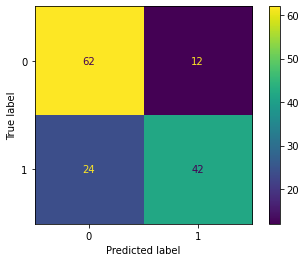

In [403]:
plot_confusion_matrix(dt,x_test,y_test)

### Random Forest Classifier

In [404]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [405]:
rf.score(x_train,y_train)

0.9

In [406]:
rf.score(x_test,y_test)

0.7571428571428571

In [407]:
preds_rf = rf.predict(x_test)

In [408]:
print(classification_report(y_test,preds_rf))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        74
           1       0.75      0.73      0.74        66

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.76      0.76      0.76       140



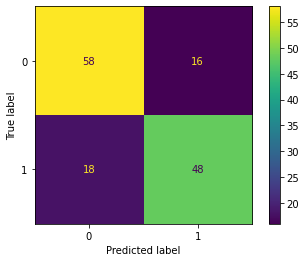

In [409]:
plot_confusion_matrix(rf,x_test,y_test)

### AdatBoost, Gradient Boost, Light GBM, XGBoost Classifier 

In [410]:
#Boosted Trees
#TASK: Use AdaBoost, Gradient Boosting, LGBMC, Catboost, XGBoost 
#to create a model and report back the classification report and plot a confusion matrix for its predicted result

In [411]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [412]:
preds_ada = ada_model.predict(x_test)

In [413]:
print(classification_report(y_test,preds_ada))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        74
           1       0.75      0.73      0.74        66

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.76      0.76      0.76       140



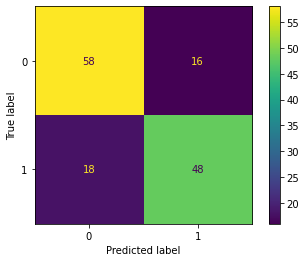

In [414]:
plot_confusion_matrix(ada_model,x_test,y_test)

In [415]:
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(x_train,y_train)
preds_XGB = XGB_model.predict(x_test)
print(classification_report(y_test,preds_XGB))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        74
           1       0.76      0.71      0.73        66

    accuracy                           0.76       140
   macro avg       0.76      0.75      0.76       140
weighted avg       0.76      0.76      0.76       140



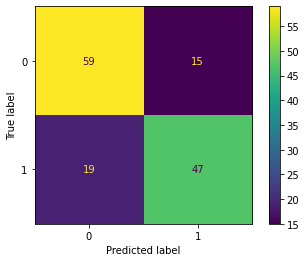

In [416]:
plot_confusion_matrix(XGB_model,x_test,y_test)

In [417]:
from lightgbm import LGBMClassifier
LGBMC_model = LGBMClassifier()
LGBMC_model.fit(x_train,y_train)
preds_lgb = LGBMC_model.predict(x_test)
print(classification_report(y_test,preds_lgb))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        74
           1       0.81      0.79      0.80        66

    accuracy                           0.81       140
   macro avg       0.81      0.81      0.81       140
weighted avg       0.81      0.81      0.81       140



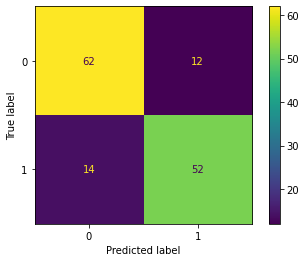

In [418]:
plot_confusion_matrix(LGBMC_model,x_test,y_test)

In [419]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
GB_model = GradientBoostingClassifier()
GB_model.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [420]:
preds_gb = GB_model.predict(x_test)

In [421]:
print(classification_report(y_test,preds_gb))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        74
           1       0.76      0.71      0.73        66

    accuracy                           0.76       140
   macro avg       0.76      0.75      0.76       140
weighted avg       0.76      0.76      0.76       140



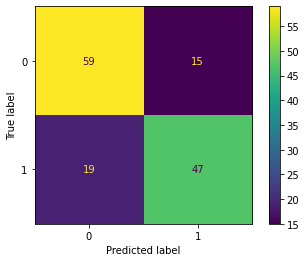

In [422]:
plot_confusion_matrix(GB_model,x_test,y_test)

We tried several different models, from the simple Logistic regression to Tree based models. Accuracy for nearly all of them is 76%, except LightGBM whose accuracy is 81%. We will proceed with Light GBM 
Note: another exercise to validate the models success can be to check precision vs. accuracy. 

## Save the model

In [423]:
# import the relevant module
import pickle

In [424]:
# pickle the model file
with open('model', 'wb') as file:
    pickle.dump(LGBMC_model, file)

In [425]:
# pickle the scaler file
with open('scaler','wb') as file:
    pickle.dump(absenteeism_scaler, file)

In [426]:
# Integration

import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin


class CustomScaler(BaseEstimator,TransformerMixin): 
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.array(np.mean(X[self.columns]))
        self.var_ = np.array(np.var(X[self.columns]))
        return self

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]



class absenteeism_model():
      
        def __init__(self, model_file, scaler_file):
            # read the 'model' and 'scaler' files which were saved
            with open('model','rb') as model_file, open('scaler', 'rb') as scaler_file:
                self.reg = pickle.load(model_file)
                self.scaler = pickle.load(scaler_file)
                self.data = None
        
        # take a data file (*.csv) and preprocess it in the same way as in the lectures
        def load_and_clean_data(self, data_file):
            
            # import the data
            df = pd.read_csv(data_file,delimiter=',')
            # store the data in a new variable for later use
            self.df_with_predictions = df.copy()
            # drop the 'ID' column
            df = df.drop(['ID'], axis = 1)
            # to preserve the code we've created in the previous section, we will add a column with 'NaN' strings
            df['Absenteeism Time in Hours'] = 'NaN'

            # create a separate dataframe, containing dummy values for ALL avaiable reasons
            reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first = True)
            
            # split reason_columns into 4 types
            reason_type_1 = reason_columns.loc[:,1:14].max(axis=1)
            reason_type_2 = reason_columns.loc[:,15:17].max(axis=1)
            reason_type_3 = reason_columns.loc[:,18:21].max(axis=1)
            reason_type_4 = reason_columns.loc[:,22:].max(axis=1)
            
            # to avoid multicollinearity, drop the 'Reason for Absence' column from df
            df = df.drop(['Reason for Absence'], axis = 1)
            
            # concatenate df and the 4 types of reason for absence
            df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)
            
            # assign names to the 4 reason type columns
            # note: there is a more universal version of this code, however the following will best suit our current purposes             
            column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
                           'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
                           'Pet', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']
            df.columns = column_names

            # re-order the columns in df
            column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date', 'Transportation Expense', 
                                      'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education', 
                                      'Children', 'Pet', 'Absenteeism Time in Hours']
            df = df[column_names_reordered]
      
            # convert the 'Date' column into datetime
            df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

            # create a list with month values retrieved from the 'Date' column
            list_months = []
            for i in range(df.shape[0]):
                list_months.append(df['Date'][i].month)

            # insert the values in a new column in df, called 'Month Value'
            df['Month Value'] = list_months

            # create a new feature called 'Day of the Week'
            df['Day of the Week'] = df['Date'].apply(lambda x: x.weekday())


            # drop the 'Date' column from df
            df = df.drop(['Date'], axis = 1)

            # re-order the columns in df
            column_names_upd = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value', 'Day of the Week',
                                'Transportation Expense', 'Distance to Work', 'Age',
                                'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
                                'Pet', 'Absenteeism Time in Hours']
            df = df[column_names_upd]


            # map 'Education' variables; the result is a dummy
            df['Education'] = df['Education'].map({1:0, 2:1, 3:1, 4:1})

            # replace the NaN values
            df = df.fillna(value=0)

            # drop the original absenteeism time
            df = df.drop(['Absenteeism Time in Hours'],axis=1)
            
            # drop the variables we decide we don't need
            df = df.drop(['Day of the Week','Daily Work Load Average','Distance to Work'],axis=1)
            
            # we have included this line of code if you want to call the 'preprocessed data'
            self.preprocessed_data = df.copy()
            
            # we need this line so we can use it in the next functions
            self.data = self.scaler.transform(df)
    
        # a function which outputs the probability of a data point to be 1
        def predicted_probability(self):
            if (self.data is not None):  
                pred = self.reg.predict_proba(self.data)[:,1]
                return pred
        
        # a function which outputs 0 or 1 based on our model
        def predicted_output_category(self):
            if (self.data is not None):
                pred_outputs = self.reg.predict(self.data)
                return pred_outputs
        
        # predict the outputs and the probabilities and 
        # add columns with these values at the end of the new data
        def predicted_outputs(self):
            if (self.data is not None):
                self.preprocessed_data['Probability'] = self.reg.predict_proba(self.data)[:,1]
                self.preprocessed_data ['Prediction'] = self.reg.predict(self.data)
                return self.preprocessed_data



In [427]:
pd.read_csv('Absenteeism_new_data.csv')

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,22,27,01/06/2018,179,26,30,237.656,19,3,0,0
1,10,7,04/06/2018,361,52,28,237.656,27,1,1,4
2,14,23,06/06/2018,155,12,34,237.656,25,1,2,0
3,17,25,08/06/2018,179,22,40,237.656,22,2,2,0
4,14,10,08/06/2018,155,12,34,237.656,25,1,2,0
5,28,11,11/06/2018,225,26,28,237.656,24,1,1,2
6,16,7,13/06/2018,118,15,46,275.089,25,1,2,0
7,22,27,13/06/2018,179,26,30,275.089,19,3,0,0
8,34,26,15/06/2018,118,10,37,275.089,28,1,0,0
9,34,10,20/06/2018,118,10,37,275.089,28,1,0,0


In [428]:
model = absenteeism_model('model','scaler')

In [429]:
model.load_and_clean_data('Absenteeism_new_data.csv')

In [430]:
model.predicted_outputs()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pet,Probability,Prediction
0,0,0.0,0,1,6,179,30,19,1,0,0,0.004646,0
1,1,0.0,0,0,6,361,28,27,0,1,4,0.975431,1
2,0,0.0,0,1,6,155,34,25,0,2,0,0.125740,0
3,0,0.0,0,1,6,179,40,22,1,2,0,0.070993,0
4,1,0.0,0,0,6,155,34,25,0,2,0,0.973830,1
5,1,0.0,0,0,6,225,28,24,0,1,2,0.595275,1
6,1,0.0,0,0,6,118,46,25,0,2,0,0.885687,1
7,0,0.0,0,1,6,179,30,19,1,0,0,0.004646,0
8,0,0.0,0,1,6,118,37,28,0,0,0,0.112056,0
9,1,0.0,0,0,6,118,37,28,0,0,0,0.730734,1


In [431]:
# Deploying the 'absenteeism_module
from absenteeism_module import *
model = absenteeism_model('model', 'scaler')

model.load_and_clean_data('Absenteeism_new_data.csv')

model.predicted_outputs()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pet,Probability,Prediction
0,0,0.0,0,1,6,179,30,19,1,0,0,0.004646,0
1,1,0.0,0,0,6,361,28,27,0,1,4,0.975431,1
2,0,0.0,0,1,6,155,34,25,0,2,0,0.125740,0
3,0,0.0,0,1,6,179,40,22,1,2,0,0.070993,0
4,1,0.0,0,0,6,155,34,25,0,2,0,0.973830,1
5,1,0.0,0,0,6,225,28,24,0,1,2,0.595275,1
6,1,0.0,0,0,6,118,46,25,0,2,0,0.885687,1
7,0,0.0,0,1,6,179,30,19,1,0,0,0.004646,0
8,0,0.0,0,1,6,118,37,28,0,0,0,0.112056,0
9,1,0.0,0,0,6,118,37,28,0,0,0,0.730734,1


In [432]:
model.predicted_outputs().to_csv('Absenteeism_predictions.csv', index = False)